### Importing Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### __1. Data Preparation & Exploratory Analysis__

In [2]:
df = pd.read_excel("data.xlsx")
df.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


We need to convert the data types of all features aprat from time to numeric.

In [4]:
for col in df.columns:
    if df[col].dtype == 'object' and df[col] is not "time":
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    376399 non-null  float64       
 2   Cyclone_Material_Temp     376128 non-null  float64       
 3   Cyclone_Outlet_Gas_draft  376398 non-null  float64       
 4   Cyclone_cone_draft        376399 non-null  float64       
 5   Cyclone_Gas_Outlet_Temp   376398 non-null  float64       
 6   Cyclone_Inlet_Draft       376397 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.2 MB


>__1.1 Check for missing values__

In [6]:
df.isna().sum()

time                           0
Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64

In [7]:
df.describe()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,377719,376399.000000,376128.000000,376398.000000,376399.000000,376398.000000,376397.000000
mean,2018-10-20 02:10:21.647840,727.348549,750.830483,-177.820685,-164.572619,715.759972,-141.302857
min,2017-01-01 00:00:00,0.000000,-185.000000,-456.660000,-459.310000,13.790000,-396.370000
25%,2017-11-24 21:07:30,856.270000,867.667500,-247.190000,-226.770000,801.960000,-193.510000
50%,2018-10-19 18:10:00,882.380000,913.360000,-215.260000,-198.560000,871.525000,-169.460000
75%,2019-09-13 15:12:30,901.110000,943.660000,-170.130000,-143.640000,899.300000,-136.290000
max,2020-08-07 12:15:00,1157.630000,1375.000000,40.270000,488.860000,1375.000000,41.640000
std,NaN,328.664814,350.921068,99.147236,90.103023,325.346446,77.615576


My idea was to fill all the null values with the mean, provided that there isn't much variance for the feature. From the above output it is clear that there exists a heavy amount of variance. Dropping the nulls won't be helpful either as this would completely disrupt the strict 5-minute indexing criteria. The next best bet is to use forward filling.

In [8]:
df_temp = df.copy()

In [9]:
df = df.fillna(method = "ffill")
df.isna().sum()
if len(df) - len(df_temp) != 0:
    print("Some data samples have been dropped! Carefully check previous steps again.")
else:
    print("All clear!")

All clear!


We can also check the difference between the data before and after applying forward filling to check if there is a huge difference.

In [10]:
df.describe() - df_temp.describe()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,0,1320.000000,1591.000000,1321.000000,1320.000000,1321.000000,1322.000000
mean,0 days 00:00:00,-1.298574,-1.404495,0.362569,0.315049,-1.270224,0.279743
min,0 days 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0 days 00:00:00,-0.370000,-0.587500,0.040000,0.050000,-2.680000,0.060000
50%,0 days 00:00:00,-0.060000,-0.130000,0.180000,0.130000,-0.125000,0.100000
75%,0 days 00:00:00,-0.010000,-0.065000,0.895000,1.200000,-0.060000,0.780000
max,0 days 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
std,NaN,1.089456,1.194657,0.233049,0.206107,1.040391,0.168133


Seemingly less variation exists.

>__1.2 Ensuring strict 5-minute indexing__

First we can check if the time difference between the first and second data sample is 5 minutes or not.

In [11]:
print(df['time'].iloc[1] - df['time'].iloc[0])

0 days 00:05:00


It is! Now we can save that into a variable and loop over the entire set of samples to check if at any point, the time difference is not 5 minutes.

In [12]:
def time_diff_check(df):

    time_diff = df['time'].iloc[1] - df['time'].iloc[0]

    for i in range(len(df['time']) - 1):
        if (df['time'].iloc[i + 1] - df['time'].iloc[i]) != time_diff:
            print("Non 5-minute index found!")
            print(f"{df['time'].iloc[i]} at index {i} & {df['time'].iloc[i + 1]} at index {i + 1}")
            print(f"Time difference: {df['time'].iloc[i + 1] - df['time'].iloc[i]}")
            print()
    print("Check complete!")

time_diff_check(df)

Non 5-minute index found!
2017-12-31 00:00:00 at index 104832 & 2018-01-01 00:00:00 at index 104833
Time difference: 1 days 00:00:00

Non 5-minute index found!
2018-12-31 00:00:00 at index 209665 & 2019-01-01 00:00:00 at index 209666
Time difference: 1 days 00:00:00

Non 5-minute index found!
2019-12-31 00:00:00 at index 314498 & 2020-01-01 00:00:00 at index 314499
Time difference: 1 days 00:00:00

Check complete!


There is a time difference of 1 day for the above three sample pairs. A quick move would be to drop them, but we can explore them further.

In [13]:
print(df.iloc[104832])
print()
print(df.iloc[104833])

time                        2017-12-31 00:00:00
Cyclone_Inlet_Gas_Temp                   853.09
Cyclone_Material_Temp                    866.88
Cyclone_Outlet_Gas_draft                -234.32
Cyclone_cone_draft                      -234.99
Cyclone_Gas_Outlet_Temp                   832.7
Cyclone_Inlet_Draft                     -185.94
Name: 104832, dtype: object

time                        2018-01-01 00:00:00
Cyclone_Inlet_Gas_Temp                   870.97
Cyclone_Material_Temp                    920.72
Cyclone_Outlet_Gas_draft                -222.35
Cyclone_cone_draft                      -223.12
Cyclone_Gas_Outlet_Temp                  883.63
Cyclone_Inlet_Draft                      -173.8
Name: 104833, dtype: object


In [14]:
print(df.iloc[209665])
print()
print(df.iloc[209666])

time                        2018-12-31 00:00:00
Cyclone_Inlet_Gas_Temp                   889.42
Cyclone_Material_Temp                    910.71
Cyclone_Outlet_Gas_draft                -242.28
Cyclone_cone_draft                       -223.3
Cyclone_Gas_Outlet_Temp                  847.83
Cyclone_Inlet_Draft                     -181.69
Name: 209665, dtype: object

time                        2019-01-01 00:00:00
Cyclone_Inlet_Gas_Temp                   873.19
Cyclone_Material_Temp                    892.16
Cyclone_Outlet_Gas_draft                -217.47
Cyclone_cone_draft                      -205.11
Cyclone_Gas_Outlet_Temp                  830.25
Cyclone_Inlet_Draft                     -164.51
Name: 209666, dtype: object


In [15]:
print(df.iloc[314498])
print()
print(df.iloc[314499])

time                        2019-12-31 00:00:00
Cyclone_Inlet_Gas_Temp                   896.89
Cyclone_Material_Temp                    926.33
Cyclone_Outlet_Gas_draft                -217.88
Cyclone_cone_draft                      -187.76
Cyclone_Gas_Outlet_Temp                  908.99
Cyclone_Inlet_Draft                     -163.87
Name: 314498, dtype: object

time                        2020-01-01 00:00:00
Cyclone_Inlet_Gas_Temp                   886.49
Cyclone_Material_Temp                    909.28
Cyclone_Outlet_Gas_draft                -237.14
Cyclone_cone_draft                      -210.54
Cyclone_Gas_Outlet_Temp                  914.37
Cyclone_Inlet_Draft                     -180.15
Name: 314499, dtype: object


We can infer that these are basically records at the same time, but right before end of the year and right after start of the next year. The differnece here will show 1 full day. We don't want that. So we fix this using `date_range` function from pandas.

In [16]:
clean_time = pd.date_range(start = df['time'].iloc[0], periods = len(df), freq = "5T") # 5 minutes
df['time'] = clean_time

In [17]:
time_diff_check(df)

Check complete!


Strict 5-minute indexing ensured!

>__1.3 Outlier analysis & handling__

We will use the classic IQR method to look for outliers.

In [46]:
df_temp = df.copy()
df_temp.drop(columns = ['time'], inplace = True)

def iqr_outliers(df):
    outliers = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].tolist()
    for col in outliers:
        print(f"Number of outliers in {col}: {len(outliers[col])}")
        
iqr_outliers(df_temp)

Number of outliers in Cyclone_Inlet_Gas_Temp: 85816
Number of outliers in Cyclone_Material_Temp: 79776
Number of outliers in Cyclone_Outlet_Gas_draft: 82014
Number of outliers in Cyclone_cone_draft: 75350
Number of outliers in Cyclone_Gas_Outlet_Temp: 80770
Number of outliers in Cyclone_Inlet_Draft: 82481


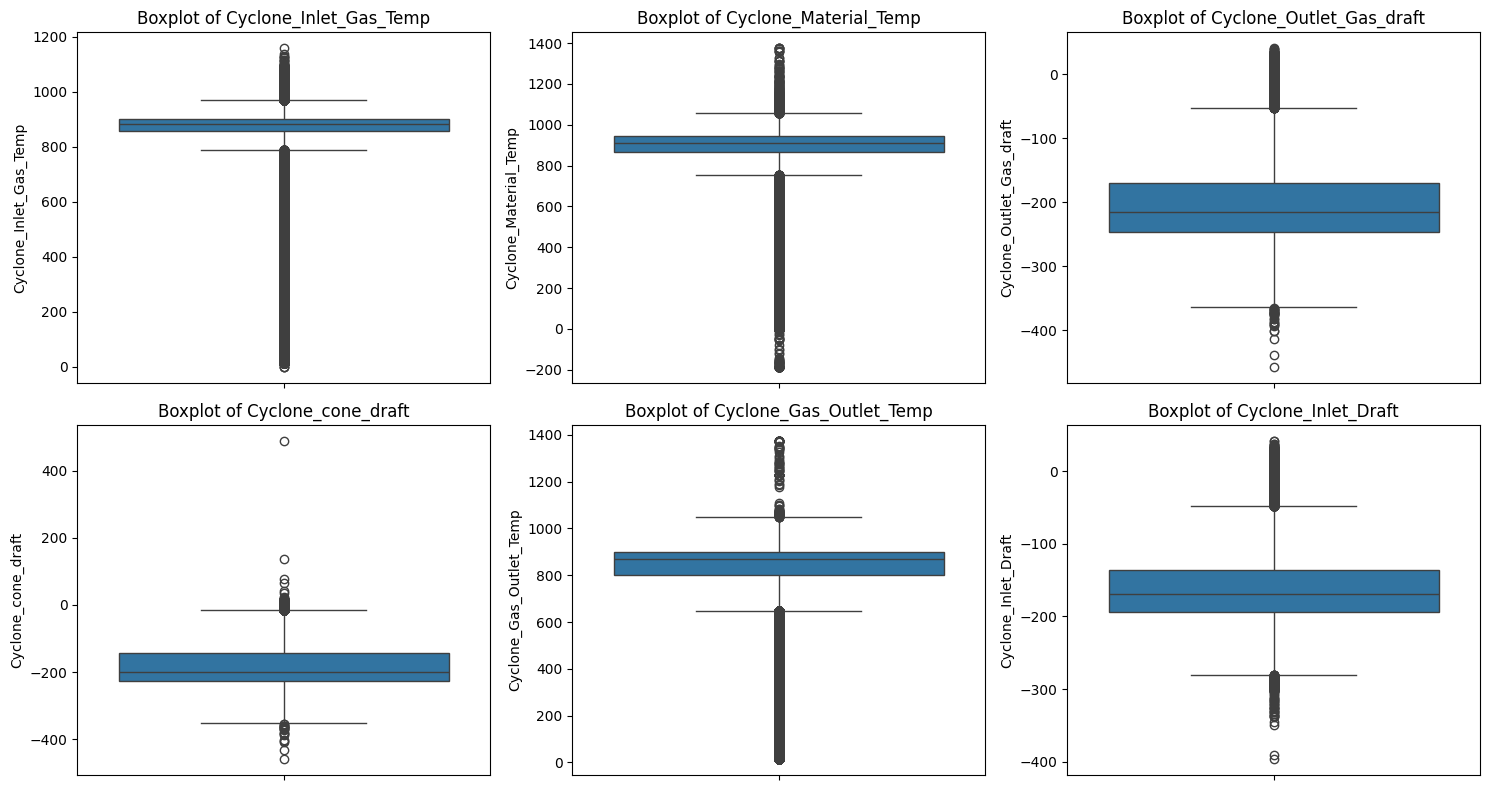

In [47]:
num_features = len(df_temp)

fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()  

for i, col in enumerate(df_temp.columns):
    sns.boxplot(y = df_temp[col], ax = axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Several outliers exist in all the features. However, dropping them is not helpful as that will break the strict 5-minute index interval rule. Another option is to cap the outliers using the IQR method, which limits extreme values to the upper and lower bounds without removing any rows. 

In [50]:
def cap_outliers(df):
    df_capped = df.copy()
    for col in df_capped.select_dtypes(include=['number']).columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # cap the values at bounds
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

capped_df = cap_outliers(df_temp)
iqr_outliers(capped_df)

Number of outliers in Cyclone_Inlet_Gas_Temp: 0
Number of outliers in Cyclone_Material_Temp: 0
Number of outliers in Cyclone_Outlet_Gas_draft: 0
Number of outliers in Cyclone_cone_draft: 0
Number of outliers in Cyclone_Gas_Outlet_Temp: 0
Number of outliers in Cyclone_Inlet_Draft: 0


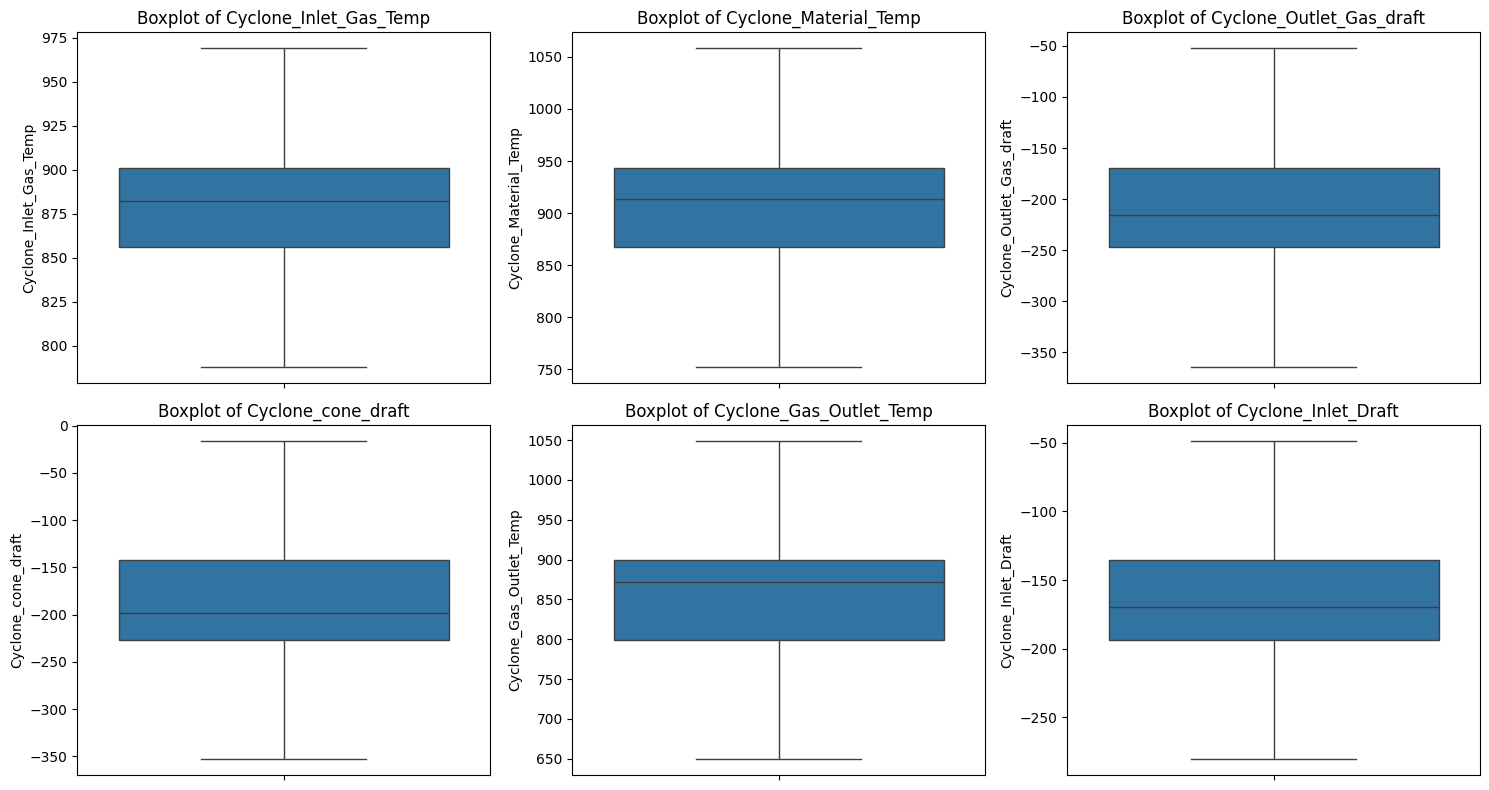

In [51]:
num_features = len(capped_df)

fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()  

for i, col in enumerate(capped_df.columns):
    sns.boxplot(y = capped_df[col], ax = axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Outliers handled.

>__1.4 Summary statistics & correlation matrix__